<img src="https://developers.lseg.com/content/dam/devportal/icons/logo/lseg-logo.svg" width="28%" align="left" style="vertical-align: top; padding-top: 23px;">
<img src="http://hilpisch.com/tpq_logo_long.png" width="36%" align="right" style="vertical-align: top;">

# LSEG Data Library for Python

**Calibrating Options Pricing Model**

Dr. Yves J. Hilpisch | The Python Quants GmbH

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

<img src="http://hilpisch.com/images/tr_eikon_02.png" width=350px align=left>

## The Agenda

This tutorial covers

* Retrieving Options Data
* Merton (1976) Jump-Diffusion Model
* Calibration of the Model

## Imports and Versions

The following imports several **packages** as used in the following.

In [1]:
import math
import lseg.data as ld
from lseg.data.discovery import Chain
import numpy as np  # NumPy
import matplotlib
import pandas as pd  # pandas
from scipy.integrate import quad

In [2]:
ld.open_session()

<lseg.data.session.Definition object at 0x266eab5f550 {name='workspace'}>

The following **Python and package versions** are used.

In [3]:
import sys
print(sys.version)

3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)]


In [4]:
ld.__version__

'1.5.1.dev151+g48514719'

In [5]:
ld.__version__

'1.5.1.dev151+g48514719'

In [6]:
pd.__version__

'2.2.2'

## Retrieving Options Data

### The Raw Data 

In what follows, data is retrieved that comprises fields for the **option type (put or call), the strike price, the closing price, the implied volatility and the underlying**.

In [7]:
fields = ['CF_DATE', 'EXPIR_DATE', 'PUTCALLIND', 'STRIKE_PRC', 'CF_CLOSE', 'IMP_VOLT', 'UNDERLYING']

Using the `ek.get_data()` method, allows data retrieval for a **single maturity of index options and multiple data fields** at the same time. You can use the "OPTSRCH" app in LSEG Workspace fo find Option Chains you are interested in.

In [8]:
dax1 = Chain(name="0#OSDXZ4*.EX")
print(dax1.constituents)

StreamingChain :: waiting to update because chain decode does not completed.
StreamingChain :: waiting to update because chain decode does not completed.
StreamingChain :: waiting to update because chain decode does not completed.
StreamingChain :: waiting to update because chain decode does not completed.


['OSDX10500L4.EX', 'OSDX10500X4.EX', 'OSDX11000L4.EX', 'OSDX11000X4.EX', 'OSDX11500L4.EX', 'OSDX11500X4.EX', 'OSDX12000L4.EX', 'OSDX12000X4.EX', 'OSDX12500L4.EX', 'OSDX12500X4.EX', 'OSDX13000L4.EX', 'OSDX13000X4.EX', 'OSDX13400L4.EX', 'OSDX13400X4.EX', 'OSDX13500L4.EX', 'OSDX13500X4.EX', 'OSDX13600L4.EX', 'OSDX13600X4.EX', 'OSDX13800L4.EX', 'OSDX13800X4.EX', 'OSDX14000L4.EX', 'OSDX14000X4.EX', 'OSDX14200L4.EX', 'OSDX14200X4.EX', 'OSDX14400L4.EX', 'OSDX14400X4.EX', 'OSDX14500L4.EX', 'OSDX14500X4.EX', 'OSDX14600L4.EX', 'OSDX14600X4.EX', 'OSDX14800L4.EX', 'OSDX14800X4.EX', 'OSDX15000L4.EX', 'OSDX15000X4.EX', 'OSDX15200L4.EX', 'OSDX15200X4.EX', 'OSDX15400L4.EX', 'OSDX15400X4.EX', 'OSDX15500L4.EX', 'OSDX15500X4.EX', 'OSDX15600L4.EX', 'OSDX15600X4.EX', 'OSDX15700L4.EX', 'OSDX15700X4.EX', 'OSDX15800L4.EX', 'OSDX15800X4.EX', 'OSDX15900L4.EX', 'OSDX15900X4.EX', 'OSDX16000L4.EX', 'OSDX16000X4.EX', 'OSDX16100L4.EX', 'OSDX16100X4.EX', 'OSDX16200L4.EX', 'OSDX16200X4.EX', 'OSDX16300L4.EX', 'OSDX1630

In [9]:
ld.get_data(dax1.constituents, fields=fields)

Instrument    CF_DATE EXPIR_DATE PUTCALLIND  STRIKE_PRC  CF_CLOSE  \
0    OSDX10500L4.EX 2024-06-24 2024-12-20       CALL        1050     713.7   
1    OSDX10500X4.EX 2024-06-24 2024-12-20       PUT         1050       1.8   
2    OSDX11000L4.EX 2024-06-24 2024-12-20       CALL        1100     665.1   
3    OSDX11000X4.EX 2024-06-24 2024-12-20       PUT         1100       2.2   
4    OSDX11500L4.EX 2024-06-24 2024-12-20       CALL        1150     616.6   
..              ...        ...        ...        ...         ...       ...   
105  OSDX18800X4.EX 2024-06-24 2024-12-20       PUT         1880     123.7   
106  OSDX18900L4.EX 2024-06-24 2024-12-20       CALL        1890      19.5   
107  OSDX18900X4.EX 2024-06-24 2024-12-20       PUT         1890     131.1   
108  OSDX19000L4.EX 2024-06-24 2024-12-20       CALL        1900      17.2   
109  OSDX19000X4.EX 2024-06-24 2024-12-20       PUT         1900     138.6   

     IMP_VOLT UNDERLYING  
0     38.2505   .DAXESGK  
1     34.3894   .DAXESGK  
2     36.0084   .DAXESGK  
3     32.5938   .DAXESGK  
4     33.8687   .DAXESGK  
..        ...        ...  
105   11.1993   .DAXESGK  
106   11.8724   .DAXESGK  
107   11.0995   .DAXESGK  
108   11.7869   .DAXESGK  
109   10.9636   .DAXESGK  

[110 rows x 8 columns]

In [10]:
dax = ld.get_data(dax1.constituents, fields=fields)
dax

Instrument    CF_DATE EXPIR_DATE PUTCALLIND  STRIKE_PRC  CF_CLOSE  \
0    OSDX10500L4.EX 2024-06-24 2024-12-20       CALL        1050     713.7   
1    OSDX10500X4.EX 2024-06-24 2024-12-20       PUT         1050       1.8   
2    OSDX11000L4.EX 2024-06-24 2024-12-20       CALL        1100     665.1   
3    OSDX11000X4.EX 2024-06-24 2024-12-20       PUT         1100       2.2   
4    OSDX11500L4.EX 2024-06-24 2024-12-20       CALL        1150     616.6   
..              ...        ...        ...        ...         ...       ...   
105  OSDX18800X4.EX 2024-06-24 2024-12-20       PUT         1880     123.7   
106  OSDX18900L4.EX 2024-06-24 2024-12-20       CALL        1890      19.5   
107  OSDX18900X4.EX 2024-06-24 2024-12-20       PUT         1890     131.1   
108  OSDX19000L4.EX 2024-06-24 2024-12-20       CALL        1900      17.2   
109  OSDX19000X4.EX 2024-06-24 2024-12-20       PUT         1900     138.6   

     IMP_VOLT UNDERLYING  
0     38.2505   .DAXESGK  
1     34.3894   .DAXESGK  
2     36.0084   .DAXESGK  
3     32.5938   .DAXESGK  
4     33.8687   .DAXESGK  
..        ...        ...  
105   11.1993   .DAXESGK  
106   11.8724   .DAXESGK  
107   11.0995   .DAXESGK  
108   11.7869   .DAXESGK  
109   10.9636   .DAXESGK  

[110 rows x 8 columns]

In [11]:
dax.head()

Instrument    CF_DATE EXPIR_DATE PUTCALLIND  STRIKE_PRC  CF_CLOSE  \
0  OSDX10500L4.EX 2024-06-24 2024-12-20       CALL        1050     713.7   
1  OSDX10500X4.EX 2024-06-24 2024-12-20       PUT         1050       1.8   
2  OSDX11000L4.EX 2024-06-24 2024-12-20       CALL        1100     665.1   
3  OSDX11000X4.EX 2024-06-24 2024-12-20       PUT         1100       2.2   
4  OSDX11500L4.EX 2024-06-24 2024-12-20       CALL        1150     616.6   

   IMP_VOLT UNDERLYING  
0   38.2505   .DAXESGK  
1   34.3894   .DAXESGK  
2   36.0084   .DAXESGK  
3   32.5938   .DAXESGK  
4   33.8687   .DAXESGK

Let us pick and store the closing value for the index.

In [12]:
GDAXI = ld.get_data(dax['UNDERLYING'].iloc[0],['CF_CLOSE']).values
GDAXI = GDAXI[0,1]
GDAXI

1563.04

In the following, we work with **call options** related data only.

In [13]:
calls = dax[dax['PUTCALLIND'] == 'CALL'].copy()

Dates delivered as `str` objects need to be transformed to `pd.Timestamp` objects.

In [14]:
for col in ['CF_DATE', 'EXPIR_DATE']:
    calls[col] = calls[col].apply(lambda date: pd.Timestamp(date))

In [15]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 0 to 108
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Instrument  55 non-null     string        
 1   CF_DATE     55 non-null     datetime64[ns]
 2   EXPIR_DATE  55 non-null     datetime64[ns]
 3   PUTCALLIND  55 non-null     string        
 4   STRIKE_PRC  55 non-null     Int64         
 5   CF_CLOSE    55 non-null     Float64       
 6   IMP_VOLT    55 non-null     Float64       
 7   UNDERLYING  55 non-null     string        
dtypes: Float64(2), Int64(1), datetime64[ns](2), string(3)
memory usage: 4.0 KB


It might make sense, to restrict the options data to those options that are not too far in or out of the money.

In [16]:
limit = 500

In [17]:
calls = calls[abs(calls['STRIKE_PRC'] - GDAXI) < limit]

In [18]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 2 to 108
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Instrument  54 non-null     string        
 1   CF_DATE     54 non-null     datetime64[ns]
 2   EXPIR_DATE  54 non-null     datetime64[ns]
 3   PUTCALLIND  54 non-null     string        
 4   STRIKE_PRC  54 non-null     Int64         
 5   CF_CLOSE    54 non-null     Float64       
 6   IMP_VOLT    54 non-null     Float64       
 7   UNDERLYING  54 non-null     string        
dtypes: Float64(2), Int64(1), datetime64[ns](2), string(3)
memory usage: 4.0 KB


The **options chain sub set** relevant for the model calibration to follow.

In [19]:
calls

Instrument    CF_DATE EXPIR_DATE PUTCALLIND  STRIKE_PRC  CF_CLOSE  \
2    OSDX11000L4.EX 2024-06-24 2024-12-20       CALL        1100     665.1   
4    OSDX11500L4.EX 2024-06-24 2024-12-20       CALL        1150     616.6   
6    OSDX12000L4.EX 2024-06-24 2024-12-20       CALL        1200     568.2   
8    OSDX12500L4.EX 2024-06-24 2024-12-20       CALL        1250     519.9   
10   OSDX13000L4.EX 2024-06-24 2024-12-20       CALL        1300     471.8   
12   OSDX13400L4.EX 2024-06-24 2024-12-20       CALL        1340     433.6   
14   OSDX13500L4.EX 2024-06-24 2024-12-20       CALL        1350     424.0   
16   OSDX13600L4.EX 2024-06-24 2024-12-20       CALL        1360     414.5   
18   OSDX13800L4.EX 2024-06-24 2024-12-20       CALL        1380     395.5   
20   OSDX14000L4.EX 2024-06-24 2024-12-20       CALL        1400     376.6   
22   OSDX14200L4.EX 2024-06-24 2024-12-20       CALL        1420     357.8   
24   OSDX14400L4.EX 2024-06-24 2024-12-20       CALL        1440     339.1   
26   OSDX14500L4.EX 2024-06-24 2024-12-20       CALL        1450     329.8   
28   OSDX14600L4.EX 2024-06-24 2024-12-20       CALL        1460     320.5   
30   OSDX14800L4.EX 2024-06-24 2024-12-20       CALL        1480     302.0   
32   OSDX15000L4.EX 2024-06-24 2024-12-20       CALL        1500     283.6   
34   OSDX15200L4.EX 2024-06-24 2024-12-20       CALL        1520     265.5   
36   OSDX15400L4.EX 2024-06-24 2024-12-20       CALL        1540     247.5   
38   OSDX15500L4.EX 2024-06-24 2024-12-20       CALL        1550     238.6   
40   OSDX15600L4.EX 2024-06-24 2024-12-20       CALL        1560     229.7   
42   OSDX15700L4.EX 2024-06-24 2024-12-20       CALL        1570     221.0   
44   OSDX15800L4.EX 2024-06-24 2024-12-20       CALL        1580     212.2   
46   OSDX15900L4.EX 2024-06-24 2024-12-20       CALL        1590     203.6   
48   OSDX16000L4.EX 2024-06-24 2024-12-20       CALL        1600     195.1   
50   OSDX16100L4.EX 2024-06-24 2024-12-20       CALL        1610     186.6   
52   OSDX16200L4.EX 2024-06-24 2024-12-20       CALL        1620     178.2   
54   OSDX16300L4.EX 2024-06-24 2024-12-20       CALL        1630     169.9   
56   OSDX16400L4.EX 2024-06-24 2024-12-20       CALL        1640     161.8   
58   OSDX16500L4.EX 2024-06-24 2024-12-20       CALL        1650     153.7   
60   OSDX16600L4.EX 2024-06-24 2024-12-20       CALL        1660     145.8   
62   OSDX16700L4.EX 2024-06-24 2024-12-20       CALL        1670     137.9   
64   OSDX16800L4.EX 2024-06-24 2024-12-20       CALL        1680     130.3   
66   OSDX16900L4.EX 2024-06-24 2024-12-20       CALL        1690     122.7   
68   OSDX17000L4.EX 2024-06-24 2024-12-20       CALL        1700     115.3   
70   OSDX17100L4.EX 2024-06-24 2024-12-20       CALL        1710     108.1   
72   OSDX17200L4.EX 2024-06-24 2024-12-20       CALL        1720     101.1   
74   OSDX17300L4.EX 2024-06-24 2024-12-20       CALL        1730      94.2   
76   OSDX17400L4.EX 2024-06-24 2024-12-20       CALL        1740      87.6   
78   OSDX17500L4.EX 2024-06-24 2024-12-20       CALL        1750      81.1   
80   OSDX17600L4.EX 2024-06-24 2024-12-20       CALL        1760      74.9   
82   OSDX17700L4.EX 2024-06-24 2024-12-20       CALL        1770      68.8   
84   OSDX17800L4.EX 2024-06-24 2024-12-20       CALL        1780      63.0   
86   OSDX17900L4.EX 2024-06-24 2024-12-20       CALL        1790      57.5   
88   OSDX18000L4.EX 2024-06-24 2024-12-20       CALL        1800      52.4   
90   OSDX18100L4.EX 2024-06-24 2024-12-20       CALL        1810      47.5   
92   OSDX18200L4.EX 2024-06-24 2024-12-20       CALL        1820      42.9   
94   OSDX18300L4.EX 2024-06-24 2024-12-20       CALL        1830      38.7   
96   OSDX18400L4.EX 2024-06-24 2024-12-20       CALL        1840      34.8   
98   OSDX18500L4.EX 2024-06-24 2024-12-20       CALL        1850      31.1   
100  OSDX18600L4.EX 2024-06-24 2024-12-20       CALL        1860      27.8   
102  OSDX18700L4.EX 2024-06-24 

### The Data Visualized

The separation allows for easily **visualization** of the closing prices and the implied volatilities.

In [20]:
calls.set_index('STRIKE_PRC')[['CF_CLOSE', 'IMP_VOLT']]

CF_CLOSE  IMP_VOLT
STRIKE_PRC                    
1100           665.1   36.0084
1150           616.6   33.8687
1200           568.2   31.7913
1250           519.9   29.7454
1300           471.8   27.7909
1340           433.6   26.3555
1350           424.0   25.9443
1360           414.5   25.5976
1380           395.5     24.88
1400           376.6   24.1925
1420           357.8   23.5259
1440           339.1   22.8719
1450           329.8   22.5537
1460           320.5   22.2235
1480           302.0   21.5746
1500           283.6   20.9196
1520           265.5   20.3321
1540           247.5   19.7189
1550           238.6   19.4239
1560           229.7   19.1114
1570           221.0    18.848
1580           212.2    18.532
1590           203.6   18.2598
1600           195.1    17.996
1610           186.6   17.7097
1620           178.2   17.4293
1630           169.9    17.153
1640           161.8   16.9051
1650           153.7   16.6306
1660           145.8   16.3795
1670           137.9   16.1001
1680           130.3   15.8633
1690           122.7   15.5954
1700           115.3   15.3415
1710           108.1   15.0988
1720           101.1   14.8646
1730            94.2   14.6155
1740            87.6   14.3919
1750            81.1   14.1494
1760            74.9   13.9278
1770            68.8   13.6836
1780            63.0    13.456
1790            57.5   13.2428
1800            52.4   13.0629
1810            47.5   12.8741
1820            42.9   12.6959
1830            38.7   12.5491
1840            34.8   12.4133
1850            31.1   12.2668
1860            27.8   12.1552
1870            24.8   12.0587
1880            22.0   11.9555
1890            19.5   11.8724
1900            17.2   11.7869

In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

for i, j in zip(['CF_CLOSE', 'IMP_VOLT'], [1, 2]):
    fig.add_trace(
        go.Scatter(x=calls.index, y=calls[i], mode='lines', name=i),
        row=1, col=j)
    fig.update_xaxes(title_text="STRIKE_PRC", row=1, col=j)
    fig.update_yaxes(title_text=i, row=1, col=j)

fig.update_layout(title_text="CF_CLOSE and IMP_VOLT vs STRIKE_PRC", height=600, width=800)

fig.show()

## Merton (1976) Jump-Diffusion Model

In the Merton (1976) jump-diffusion model, the **risk-neutral index level dynamics** are given by the SDE

$$
dS_{t}=(r-r_{J})S_{t}dt+\sigma S_{t}dZ_{t}+J_{t}S_{t}dN_{t}
$$

The variables and parameters have the following meaning:

* $S_{t}$ index level at date $t$
* $r$ constant risk-less short rate 
* $r_{J}\equiv \lambda \cdot \left(e^{\mu_{J}+\delta^{2}/2}-1\right)$ drift correction for jump
* $\sigma$ constant volatility of $S$
* $Z_{t}$ standard Brownian motion
* $J_{t}$ jump at date $t$ with distribution $\log(1+J_{t}) \approx \mathbf{N}\left(\log(1+\mu_{J})-\frac{\delta^{2}}{2},\delta^{2}\right)$
* $\mathbf{N}$ as the cumulative distribution function of a standard normal random variable
* $N_{t}$ Poisson process with intensity $\lambda$

For details, refer to Hilpisch, Yves (2015): _Derivatives Analytics with Python._ Wiley Finance.

The **characteristic function for the Merton (1976) model** is given as:

$$
\varphi_{0}^{M76}(u,T)=\exp\left(\left(iu\omega -\frac{u^{2}\sigma^{2}}{2}+\lambda \left(e^{iu\mu_{J}-u^{2}\delta^{2}/2}-1\right)\right)T\right)
$$

where the **risk-neutral drift term $\omega$** takes on the form

$$
\omega=r-\frac{\sigma^{2}}{2}-\lambda\left(e^{\mu_{J}+\delta^{2}/2}-1\right)
$$

Combining this with the option pricing result from Lewis (2001) we get for the **price of a European call option**

$$
C_{0}=S_{0}-\frac{\sqrt{S_{0}K}e^{-rT/2}}{\pi}\int_{0}^{\infty} \mathbf{Re}\left[e^{izk} \varphi_{0}^{M76}(z-i/2,T)\right] \frac{dz}{z^2+1/4}
$$

Let us implement the **European call option pricing formula** in Python. First, the **characteristic function**.

In [22]:
def M76_characteristic_function(u, T, r, sigma, lamb, mu, delta):
    omega = r - 0.5 * sigma ** 2 - lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
    value = np.exp((1j * u * omega - 0.5 * u ** 2 * sigma ** 2 +
            lamb * (np.exp(1j * u * mu - u ** 2 * delta ** 2 * 0.5) - 1))  * T)
    return value

Second, the **integration function**.

In [23]:
def M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta):
    JDCF = M76_characteristic_function(u - 0.5 * 1j, T, r,
                                       sigma, lamb, mu, delta)
    value = 1 / (u ** 2 + 0.25) * (np.exp(1j * u * math.log(S0 / K))
                                    * JDCF).real
    return value

Third, the **evaluation of the integral** via numerical quadrature.

In [24]:
def M76_value_call_INT(S0, K, T, r, sigma, lamb, mu, delta):
    int_value = quad(lambda u: M76_integration_function(u, S0, K, T, r,
                    sigma, lamb, mu, delta), 0, 50, limit=250)[0]
    call_value = S0 - np.exp(-r * T) * math.sqrt(S0 * K) / math.pi * int_value
    return call_value

Fourth, a **numerical example**.

In [25]:
K = GDAXI  # strike level = index level
T = 1.0  # call option maturity
r = 0.005  # constant short rate
sigma = 0.4  # constant volatility of diffusion
lamb = 1.0  # jump frequency p.a.
mu = -0.2  # expected jump size
delta = 0.1  # jump size volatility

In [26]:
print ('Value of Call Option %8.3f' \
            % M76_value_call_INT(GDAXI, K, T, r, sigma, lamb, mu, delta))

Value of Call Option  281.468


## Calibration of the Model

In simple terms, the problem of **calibration** is to find parameters for the Merton (1976) model such that observed market quotes of liquidly traded plain vanilla options are replicated as good as possible. To this end, one defines an error function that is to be minimized. Such a function could be the Root Mean Squared Error (RMSE). The task is then to solve the problem

$$
\min_{\sigma, \lambda, \mu_{J}, \delta } \sqrt{\frac{1}{N}\sum_{n=1}^{N}\left( C_{n}^{*} - C_{n}^{M76}(\sigma, \lambda, \mu_{J}, \delta )\right)^{2}}
$$
with the $C_{n}^{*}$ being the market or input prices and the $C_{n}^{M76}$ being the model or output prices for the options $n=1,...,N$.

Next, we define an **error function** in Python for the calibration. 

In [27]:
i = 0; min_RMSE = 100.
def M76_error_function(p0):
    global i, min_RMSE
    sigma, lamb, mu, delta = p0
    if sigma < 0.0 or delta < 0.0 or lamb < 0.0:
        return 500.0
    se = []
    for row, option in calls.iterrows():
        T = (option['EXPIR_DATE'] - option['CF_DATE']).days / 365.
        model_value = M76_value_call_INT(GDAXI, option['STRIKE_PRC'], T,
                                         r, sigma, lamb, mu, delta)
        se.append((model_value - option['CF_CLOSE']) ** 2)
    RMSE = math.sqrt(sum(se) / len(se))
    min_RMSE = min(min_RMSE, RMSE)
    if i % 100 == 0:
        print ('%4d |' % i, np.array(p0), '| %7.3f | %7.3f' % (RMSE, min_RMSE))
    i += 1
    return RMSE

The calibration is done in two steps. First, a **global optimization**.

In [28]:
%%time
import scipy.optimize as sop
np.set_printoptions(suppress=True,
                    formatter={'all': lambda x: '%6.3f' % x})
p0 = sop.brute(M76_error_function, ((0.10, 0.201, 0.025),
                   (0.10, 0.80, 0.10), (-0.40, 0.01, 0.10),
                   (0.00, 0.121, 0.02)), finish=None)

   0 | [ 0.100  0.100 -0.400  0.000] | 139.927 | 100.000
 100 | [ 0.100  0.300  0.000  0.040] | 147.863 | 100.000
 200 | [ 0.100  0.600 -0.100  0.080] | 140.842 |  98.018
 300 | [ 0.125  0.200 -0.200  0.120] | 136.561 |  90.190
 400 | [ 0.125  0.500 -0.200  0.020] | 129.261 |  90.190
 500 | [ 0.150  0.100 -0.300  0.060] | 132.057 |  87.454
 600 | [ 0.150  0.400 -0.400  0.100] | 106.064 |  87.454
 700 | [ 0.150  0.700 -0.400  0.000] |  85.220 |  85.220
 800 | [ 0.175  0.200  0.000  0.040] | 130.796 |  84.516
 900 | [ 0.175  0.500 -0.100  0.080] | 125.887 |  84.516
1000 | [ 0.200  0.100 -0.200  0.120] | 121.723 |  81.471
1100 | [ 0.200  0.400 -0.200  0.020] | 115.471 |  81.471
1200 | [ 0.200  0.700 -0.300  0.060] |  94.463 |  78.419
CPU times: total: 2min 18s
Wall time: 2min 19s


Second, the **local (convex) optimization**.

In [29]:
%%time
opt = sop.fmin(M76_error_function, p0, xtol=0.00001,
                    ftol=0.00001, maxiter=750, maxfun=1500)

1300 | [ 0.072  0.394 -1.478  0.150] |  26.785 |  19.140
1400 | [ 0.069  0.337 -3.613  0.012] |  10.154 |  10.041
1500 | [ 0.080  0.325 -6.364  0.017] |   9.545 |   9.545
1600 | [ 0.077  0.325 -13.892  0.064] |   9.496 |   9.496
1700 | [ 0.077  0.325 -14.026  0.065] |   9.496 |   9.496
1800 | [ 0.077  0.325 -14.026  0.065] |   9.496 |   9.496
Optimization terminated successfully.
         Current function value: 9.496289
         Iterations: 361
         Function evaluations: 632
CPU times: total: 3min 28s
Wall time: 3min 29s


Given the **optimal parameters**, the model prices after calibration can be calculated.

In [30]:
sigma, lamb, mu, delta = opt
calls['MODEL_PRICE'] = 0.0
for row, option in calls.iterrows():
    T = (option['EXPIR_DATE'] - option['CF_DATE']).days / 365.
    calls.loc[row, 'MODEL_PRICE'] = M76_value_call_INT(GDAXI, option['STRIKE_PRC'],
                                T, r, sigma, lamb, mu, delta)

In [31]:
calls

Instrument    CF_DATE EXPIR_DATE PUTCALLIND  STRIKE_PRC  CF_CLOSE  \
2    OSDX11000L4.EX 2024-06-24 2024-12-20       CALL        1100     665.1   
4    OSDX11500L4.EX 2024-06-24 2024-12-20       CALL        1150     616.6   
6    OSDX12000L4.EX 2024-06-24 2024-12-20       CALL        1200     568.2   
8    OSDX12500L4.EX 2024-06-24 2024-12-20       CALL        1250     519.9   
10   OSDX13000L4.EX 2024-06-24 2024-12-20       CALL        1300     471.8   
12   OSDX13400L4.EX 2024-06-24 2024-12-20       CALL        1340     433.6   
14   OSDX13500L4.EX 2024-06-24 2024-12-20       CALL        1350     424.0   
16   OSDX13600L4.EX 2024-06-24 2024-12-20       CALL        1360     414.5   
18   OSDX13800L4.EX 2024-06-24 2024-12-20       CALL        1380     395.5   
20   OSDX14000L4.EX 2024-06-24 2024-12-20       CALL        1400     376.6   
22   OSDX14200L4.EX 2024-06-24 2024-12-20       CALL        1420     357.8   
24   OSDX14400L4.EX 2024-06-24 2024-12-20       CALL        1440     339.1   
26   OSDX14500L4.EX 2024-06-24 2024-12-20       CALL        1450     329.8   
28   OSDX14600L4.EX 2024-06-24 2024-12-20       CALL        1460     320.5   
30   OSDX14800L4.EX 2024-06-24 2024-12-20       CALL        1480     302.0   
32   OSDX15000L4.EX 2024-06-24 2024-12-20       CALL        1500     283.6   
34   OSDX15200L4.EX 2024-06-24 2024-12-20       CALL        1520     265.5   
36   OSDX15400L4.EX 2024-06-24 2024-12-20       CALL        1540     247.5   
38   OSDX15500L4.EX 2024-06-24 2024-12-20       CALL        1550     238.6   
40   OSDX15600L4.EX 2024-06-24 2024-12-20       CALL        1560     229.7   
42   OSDX15700L4.EX 2024-06-24 2024-12-20       CALL        1570     221.0   
44   OSDX15800L4.EX 2024-06-24 2024-12-20       CALL        1580     212.2   
46   OSDX15900L4.EX 2024-06-24 2024-12-20       CALL        1590     203.6   
48   OSDX16000L4.EX 2024-06-24 2024-12-20       CALL        1600     195.1   
50   OSDX16100L4.EX 2024-06-24 2024-12-20       CALL        1610     186.6   
52   OSDX16200L4.EX 2024-06-24 2024-12-20       CALL        1620     178.2   
54   OSDX16300L4.EX 2024-06-24 2024-12-20       CALL        1630     169.9   
56   OSDX16400L4.EX 2024-06-24 2024-12-20       CALL        1640     161.8   
58   OSDX16500L4.EX 2024-06-24 2024-12-20       CALL        1650     153.7   
60   OSDX16600L4.EX 2024-06-24 2024-12-20       CALL        1660     145.8   
62   OSDX16700L4.EX 2024-06-24 2024-12-20       CALL        1670     137.9   
64   OSDX16800L4.EX 2024-06-24 2024-12-20       CALL        1680     130.3   
66   OSDX16900L4.EX 2024-06-24 2024-12-20       CALL        1690     122.7   
68   OSDX17000L4.EX 2024-06-24 2024-12-20       CALL        1700     115.3   
70   OSDX17100L4.EX 2024-06-24 2024-12-20       CALL        1710     108.1   
72   OSDX17200L4.EX 2024-06-24 2024-12-20       CALL        1720     101.1   
74   OSDX17300L4.EX 2024-06-24 2024-12-20       CALL        1730      94.2   
76   OSDX17400L4.EX 2024-06-24 2024-12-20       CALL        1740      87.6   
78   OSDX17500L4.EX 2024-06-24 2024-12-20       CALL        1750      81.1   
80   OSDX17600L4.EX 2024-06-24 2024-12-20       CALL        1760      74.9   
82   OSDX17700L4.EX 2024-06-24 2024-12-20       CALL        1770      68.8   
84   OSDX17800L4.EX 2024-06-24 2024-12-20       CALL        1780      63.0   
86   OSDX17900L4.EX 2024-06-24 2024-12-20       CALL        1790      57.5   
88   OSDX18000L4.EX 2024-06-24 2024-12-20       CALL        1800      52.4   
90   OSDX18100L4.EX 2024-06-24 2024-12-20       CALL        1810      47.5   
92   OSDX18200L4.EX 2024-06-24 2024-12-20       CALL        1820      42.9   
94   OSDX18300L4.EX 2024-06-24 2024-12-20       CALL        1830      38.7   
96   OSDX18400L4.EX 2024-06-24 2024-12-20       CALL        1840      34.8   
98   OSDX18500L4.EX 2024-06-24 2024-12-20       CALL        1850      31.1   
100  OSDX18600L4.EX 2024-06-24 2024-12-20       CALL        1860      27.8   
102  OSDX18700L4.EX 2024-06-24 

The calibration yields **model prices** not "too different" from the market prices.

<Axes: >

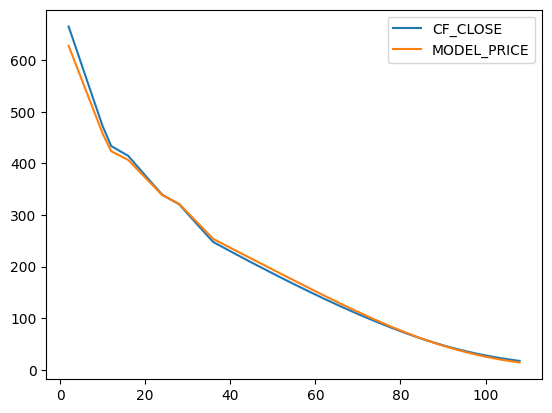

In [32]:
calls[['CF_CLOSE', 'MODEL_PRICE']].plot(kind='line')

The following calculates and visualizes the **relative pricing errors in percent**.

In [33]:
rdiffs = (calls['MODEL_PRICE'] - calls['CF_CLOSE']) / calls['CF_CLOSE'] * 100

<Axes: ylabel='pricing errors [%]'>

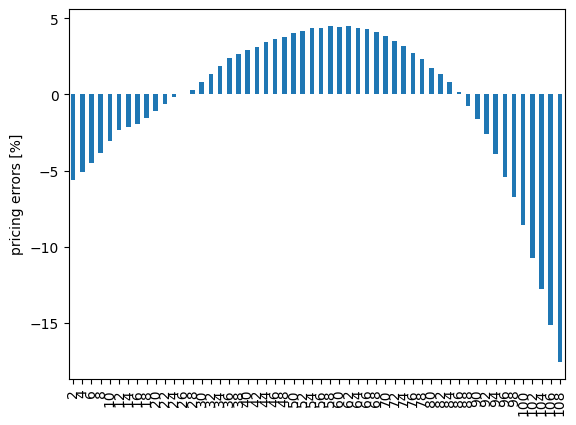

In [34]:
rdiffs.plot(kind='bar', ylabel='pricing errors [%]')

## Conclusions

This tutorial covers:

* Retrieving Options Data
* Merton (1976) Jump-Diffusion Model
* Calibration of the Model

## References

For financial, numerical and programming details with regard to option pricing models and their calibration in Python, refer to:

* Hilpisch, Yves (2015): _Derivatives Analytics with Python._ Wiley Finance.

## LSEG Data Library for Python's Developer Resources

* [Overview](https://developers.thomsonreuters.com/eikon-data-apis) 
* [Quick Start ](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/quick-start)
* [Documentation](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/documentation)
* [Downloads](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/downloads)
* [Tutorials](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/tutorials)
* [Q&A Forums](https://community.developers.refinitiv.com/index.html) 

[Data Item Browser](https://developers.lseg.com/en/video-catalog/data-item-browser) Application: Type `DIB` into LSEG Workspace Search Bar.

* [Article on Chains](https://developers.lseg.com/en/article-catalog/article/simple-chain-objects-ema-part-1)

<img src="https://developers.lseg.com/content/dam/devportal/icons/logo/lseg-logo.svg" width="28%" align="left" style="vertical-align: top; padding-top: 23px;">
<img src="http://hilpisch.com/tpq_logo_long.png" width="36%" align="right" style="vertical-align: top;">